**Name:** Rahul Kumar

**Student ID:** rxk190002

***

# Classification


**Link** : https://www.kaggle.com/jpacse/datasets-for-churn-telecom*
        
Goal : To predict whether customer will churn or not in telecom industries
Dataset:- Churn Telecom(23 categorical variables)

majority : miniority class = 7.1 : 2.9 <br>
missing data : about 5% <br>
Evaluation Metric: Accuracy

This dataset is imbalanced dataset where we need to predict two classes "Yes" or "No".
In the dataset, there are 71% majority class which is less than 80% so I decided to go with accuracy as evaluation metric.  
    
- Best Model parameters - {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}       (XGBoost)
- Mean Cross validation score of Best model - 0.9281778380710121 (XGBoost)
- Test score of best model - 0.9317335945151812 (XGBoost)
- Train score of best model - 0.9323162818032666 (XGBoost)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn = pd.read_csv(r"C:\Users\Rahul\Downloads\Exam-\ChurnTelecom.csv")

In [3]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
churn.shape

(51047, 58)

In [78]:

categorical = [var for var in churn.columns if churn[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')

There are 23 categorical variables


In [7]:
churn['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [8]:
# CustomerID(unique) variable

print('Number of Customer ID labels: ', len(churn.CustomerID.unique()))

Number of Customer ID labels:  51047


In [9]:
##add missing values
#select 5% of total
miss_count = round(len(churn['CustomerID']) * 0.05)
#add nans to MonthlyRevenue
miss_index1 = pd.Series(np.random.randint(1,len(churn['CustomerID']),miss_count))
for value in miss_index1:
    churn.at[value,'MonthlyRevenue'] = np.nan
#add nans to MonthlyMinutes
miss_index2 = pd.Series(np.random.randint(1,len(churn['CustomerID']),miss_count))
for value in miss_index2:
    churn.at[value,'MonthlyMinutes'] = np.nan
#add nans to TotalRecurringCharge 
miss_index3 = pd.Series(np.random.randint(1,len(churn['CustomerID']),miss_count))
for value in miss_index3:
    churn.at[value,'TotalRecurringCharge'] = np.nan
#add nans to OverageMinutes    
miss_index3 = pd.Series(np.random.randint(1,len(churn['CustomerID']),miss_count))
for value in miss_index3:
    churn.at[value,'OverageMinutes'] = np.nan
#add nans to PercChangeMinutes    
miss_index3 = pd.Series(np.random.randint(1,len(churn['CustomerID']),miss_count))
for value in miss_index3:
    churn.at[value,'PercChangeMinutes'] = np.nan

In [10]:
churn.isna().sum()

CustomerID                      0
Churn                           0
MonthlyRevenue               2640
MonthlyMinutes               2657
TotalRecurringCharge         2645
DirectorAssistedCalls         156
OverageMinutes               2641
RoamingCalls                  156
PercChangeMinutes            2841
PercChangeRevenues            367
DroppedCalls                    0
BlockedCalls                    0
UnansweredCalls                 0
CustomerCareCalls               0
ThreewayCalls                   0
ReceivedCalls                   0
OutboundCalls                   0
InboundCalls                    0
PeakCallsInOut                  0
OffPeakCallsInOut               0
DroppedBlockedCalls             0
CallForwardingCalls             0
CallWaitingCalls                0
MonthsInService                 0
UniqueSubs                      0
ActiveSubs                      0
ServiceArea                    24
Handsets                        1
HandsetModels                   1
CurrentEquipme

In [11]:
churn.isna().sum().sum()

15948

In [14]:
churn['PercChangeMinutes'] = churn['PercChangeMinutes'].fillna(value = churn['PercChangeMinutes'].mean())
churn['PercChangeRevenues'] = churn['PercChangeRevenues'].fillna(value = churn['PercChangeRevenues'].mean())

## Converting the categorical variables to nominal data

In [15]:
churn['HasCreditCard'].value_counts()

Yes    34503
No     16544
Name: HasCreditCard, dtype: int64

Changing Yes to 1 and No to 0 in HasCreditCard column

In [16]:
churn['HasCreditCard'] = np.where((churn.HasCreditCard == "Yes"),1,churn.HasCreditCard)
churn['HasCreditCard'] = np.where((churn.HasCreditCard == "No"),0,churn.HasCreditCard)

In [17]:
churn['NewCellphoneUser'].value_counts()

No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64

Changing Yes to 0 and No to 1 in NewCellphoneUser column

In [19]:
churn['NewCellphoneUser'] = np.where((churn.NewCellphoneUser == "Yes"),0,churn.NewCellphoneUser)
churn['NewCellphoneUser'] = np.where((churn.NewCellphoneUser == "No"),1,churn.NewCellphoneUser)

In [20]:
churn['CreditRating'].value_counts()

2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64

In [21]:
churn['CreditRating'] = np.where((churn.CreditRating == "1-Highest"),1,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "2-High"),2,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "3-Good"),3,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "4-Medium"),4,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "5-Low"),5,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "6-VeryLow"),6,churn.CreditRating)
churn['CreditRating'] = np.where((churn.CreditRating == "7-Lowest"),7,churn.CreditRating)

In [22]:
churn.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,NaN,0.0,-4.0,0.0,...,0,5,No,0,30,No,4,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,NaN,0.0,157.0,8.1,...,0,6,No,0,10,No,4,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1,Other,Professional,Yes


In [23]:
churn['Occupation'].value_counts()

Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64

In [24]:
churn['Occupation'] = np.where((churn.Occupation == "Professional"),1,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Crafts"),2,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Clerical"),3,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Self"),4,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Retired"),5,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Student"),6,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Homemaker"),7,churn.Occupation)
churn['Occupation'] = np.where((churn.Occupation == "Other"),8,churn.Occupation)

In [25]:
priz = pd.get_dummies(churn['PrizmCode'])

In [26]:
churn = pd.concat([churn,priz], axis = 1)

In [27]:
churn.drop(['PrizmCode'], axis = 1, inplace = True )

In [28]:
churn['MadeCallToRetentionTeam'] = np.where((churn.MadeCallToRetentionTeam == "Yes"),0,churn.MadeCallToRetentionTeam)
churn['MadeCallToRetentionTeam'] = np.where((churn.MadeCallToRetentionTeam == "No"),1,churn.MadeCallToRetentionTeam)

In [29]:
churn['NotNewCellphoneUser'] = np.where((churn.NotNewCellphoneUser == "Yes"),0,churn.NotNewCellphoneUser)
churn['NotNewCellphoneUser'] = np.where((churn.NotNewCellphoneUser == "No"),1,churn.NotNewCellphoneUser)

In [30]:
churn['OwnsMotorcycle'] = np.where((churn.OwnsMotorcycle == "Yes"),0,churn.OwnsMotorcycle)
churn['OwnsMotorcycle'] = np.where((churn.OwnsMotorcycle == "No"),1,churn.OwnsMotorcycle)

In [31]:
churn['MaritalStatus'] = np.where((churn.MaritalStatus == "Yes"),1,churn.MaritalStatus)
churn['MaritalStatus'] = np.where((churn.MaritalStatus == "No"),0,churn.MaritalStatus)
churn['MaritalStatus'] = np.where((churn.MaritalStatus == "Unknown"),0,churn.MaritalStatus)

In [32]:
churn['OwnsComputer'].value_counts()

No     41583
Yes     9464
Name: OwnsComputer, dtype: int64

In [34]:
churn['ChildrenInHH'] = np.where((churn.ChildrenInHH == "Yes"),0,churn.ChildrenInHH)
churn['ChildrenInHH'] = np.where((churn.ChildrenInHH == "No"),1,churn.ChildrenInHH)

In [35]:
churn['HandsetRefurbished'] = np.where((churn.HandsetRefurbished == "Yes"),0,churn.HandsetRefurbished)
churn['HandsetRefurbished'] = np.where((churn.HandsetRefurbished == "No"),1,churn.HandsetRefurbished)

In [36]:
churn['HandsetWebCapable'] = np.where((churn.HandsetWebCapable == "Yes"),1,churn.HandsetWebCapable)
churn['HandsetWebCapable'] = np.where((churn.HandsetWebCapable == "No"),0,churn.HandsetWebCapable)

In [37]:
churn['TruckOwner'] = np.where((churn.TruckOwner == "Yes"),0,churn.TruckOwner)
churn['TruckOwner'] = np.where((churn.TruckOwner == "No"),1,churn.TruckOwner)

In [38]:
churn['RVOwner'] = np.where((churn.RVOwner == "Yes"),0,churn.RVOwner)
churn['RVOwner'] = np.where((churn.RVOwner == "No"),1,churn.RVOwner)

In [39]:
churn['Homeownership'] = np.where((churn.Homeownership == "Unknown"),0,churn.Homeownership)
churn['Homeownership'] = np.where((churn.Homeownership == "Known"),1,churn.Homeownership)

In [40]:
churn['BuysViaMailOrder'] = np.where((churn.BuysViaMailOrder == "Yes"),0,churn.BuysViaMailOrder)
churn['BuysViaMailOrder'] = np.where((churn.BuysViaMailOrder == "No"),1,churn.BuysViaMailOrder)

In [41]:
churn['RespondsToMailOffers'] = np.where((churn.RespondsToMailOffers == "Yes"),0,churn.RespondsToMailOffers)
churn['RespondsToMailOffers'] = np.where((churn.RespondsToMailOffers == "No"),1,churn.RespondsToMailOffers)

In [42]:
churn['OptOutMailings'] = np.where((churn.OptOutMailings == "Yes"),0,churn.OptOutMailings)
churn['OptOutMailings'] = np.where((churn.OptOutMailings == "No"),1,churn.OptOutMailings)

In [43]:
churn['NonUSTravel'] = np.where((churn.NonUSTravel == "Yes"),0,churn.NonUSTravel)
churn['NonUSTravel'] = np.where((churn.NonUSTravel == "No"),1,churn.NonUSTravel)

In [44]:
churn['OwnsComputer'] = np.where((churn.OwnsComputer == "Yes"),0,churn.OwnsComputer)
churn['OwnsComputer'] = np.where((churn.OwnsComputer == "No"),1,churn.OwnsComputer)

In [45]:
churn['Churn'] = np.where((churn.HasCreditCard == "Yes"),0,churn.HasCreditCard)
churn['Churn'] = np.where((churn.HasCreditCard == "No"),1,churn.HasCreditCard)

In [46]:
churn.drop(['CustomerID', 'HandsetPrice','ServiceArea'], axis = 1, inplace = True)

In [47]:
churn.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

Converting the data types of object columns to numeric for Correlation Matrix

In [48]:
churn["Churn"] = pd.to_numeric(churn["Churn"])
churn["ChildrenInHH"] = pd.to_numeric(churn["ChildrenInHH"])
churn["HandsetRefurbished"] = pd.to_numeric(churn["HandsetRefurbished"])
churn["HandsetWebCapable"] = pd.to_numeric(churn["HandsetWebCapable"])
churn["TruckOwner"] = pd.to_numeric(churn["TruckOwner"])
churn["RVOwner"] = pd.to_numeric(churn["RVOwner"])
churn["RespondsToMailOffers"] = pd.to_numeric(churn["RespondsToMailOffers"])
churn["Homeownership"] = pd.to_numeric(churn["Homeownership"])
churn["BuysViaMailOrder"] = pd.to_numeric(churn["BuysViaMailOrder"])
churn["OptOutMailings"] = pd.to_numeric(churn["OptOutMailings"])
churn["NonUSTravel"] = pd.to_numeric(churn["NonUSTravel"])
churn["OwnsComputer"] = pd.to_numeric(churn["OwnsComputer"])
churn["HasCreditCard"] = pd.to_numeric(churn["HasCreditCard"])
churn["NewCellphoneUser"] = pd.to_numeric(churn["NewCellphoneUser"])
churn["NotNewCellphoneUser"] = pd.to_numeric(churn["NotNewCellphoneUser"])
churn["OwnsMotorcycle"] = pd.to_numeric(churn["OwnsMotorcycle"])
churn["MadeCallToRetentionTeam"] = pd.to_numeric(churn["MadeCallToRetentionTeam"])
churn["CreditRating"] = pd.to_numeric(churn["CreditRating"])
churn["Occupation"] = pd.to_numeric(churn["Occupation"])
churn["MaritalStatus"] = pd.to_numeric(churn["MaritalStatus"])

In [49]:
churn.dtypes

Churn                          int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

In [50]:
churn.corr()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,Occupation,MaritalStatus,Other,Rural,Suburban,Town
Churn,1.000000,-0.084411,-0.126240,-0.085493,-0.043565,-0.046734,-0.020957,0.015419,0.006185,-0.082846,...,-0.063227,0.012334,0.006325,-0.242064,-0.345615,0.430143,-0.142849,0.016711,0.105804,0.051830
MonthlyRevenue,-0.084411,1.000000,0.710844,0.630044,0.408873,0.781067,0.307178,-0.032562,-0.008849,0.433416,...,0.010674,0.033917,-0.011757,0.141268,0.080857,-0.097853,0.050024,-0.009457,-0.024110,-0.032946
MonthlyMinutes,-0.126240,0.710844,1.000000,0.582376,0.391829,0.570006,0.110542,-0.039789,-0.036267,0.590682,...,0.016220,0.044304,-0.008395,0.203450,0.110921,-0.148278,0.079588,-0.030488,-0.032557,-0.050787
TotalRecurringCharge,-0.085493,0.630044,0.582376,1.000000,0.310987,0.197591,0.072801,-0.013672,-0.024484,0.350761,...,0.012516,0.041674,0.025068,0.132691,0.071145,-0.090776,0.041789,-0.006356,-0.022500,-0.025315
DirectorAssistedCalls,-0.043565,0.408873,0.391829,0.310987,1.000000,0.288770,0.069990,-0.024499,-0.016002,0.263693,...,0.006664,0.022697,-0.010052,0.075503,0.044969,-0.039648,0.018409,-0.013642,0.000866,-0.018819
OverageMinutes,-0.046734,0.781067,0.570006,0.197591,0.288770,1.000000,0.063861,-0.035008,-0.014894,0.329288,...,0.008196,0.021051,-0.014623,0.080939,0.051240,-0.060940,0.029541,-0.008530,-0.010972,-0.021988
RoamingCalls,-0.020957,0.307178,0.110542,0.072801,0.069990,0.063861,1.000000,-0.054314,-0.090718,0.068529,...,-0.011132,0.004492,0.001858,0.016182,0.014373,-0.007313,-0.000542,0.023946,-0.018090,0.010168
PercChangeMinutes,0.015419,-0.032562,-0.039789,-0.013672,-0.024499,-0.035008,-0.054314,1.000000,0.576527,-0.078649,...,0.003416,-0.004125,0.023450,-0.033083,-0.009955,0.004374,0.003304,-0.003667,0.001135,-0.003937
PercChangeRevenues,0.006185,-0.008849,-0.036267,-0.024484,-0.016002,-0.014894,-0.090718,0.576527,1.000000,-0.037256,...,0.000300,-0.005542,0.020555,-0.021175,-0.009724,0.002628,0.000025,-0.003463,0.002477,-0.001215
DroppedCalls,-0.082846,0.433416,0.590682,0.350761,0.263693,0.329288,0.068529,-0.078649,-0.037256,1.000000,...,0.016147,0.031039,-0.019415,0.190854,0.090022,-0.116911,0.088579,-0.028769,-0.038528,-0.056666


## Creating a Heatmap out of the data to find correlated columns

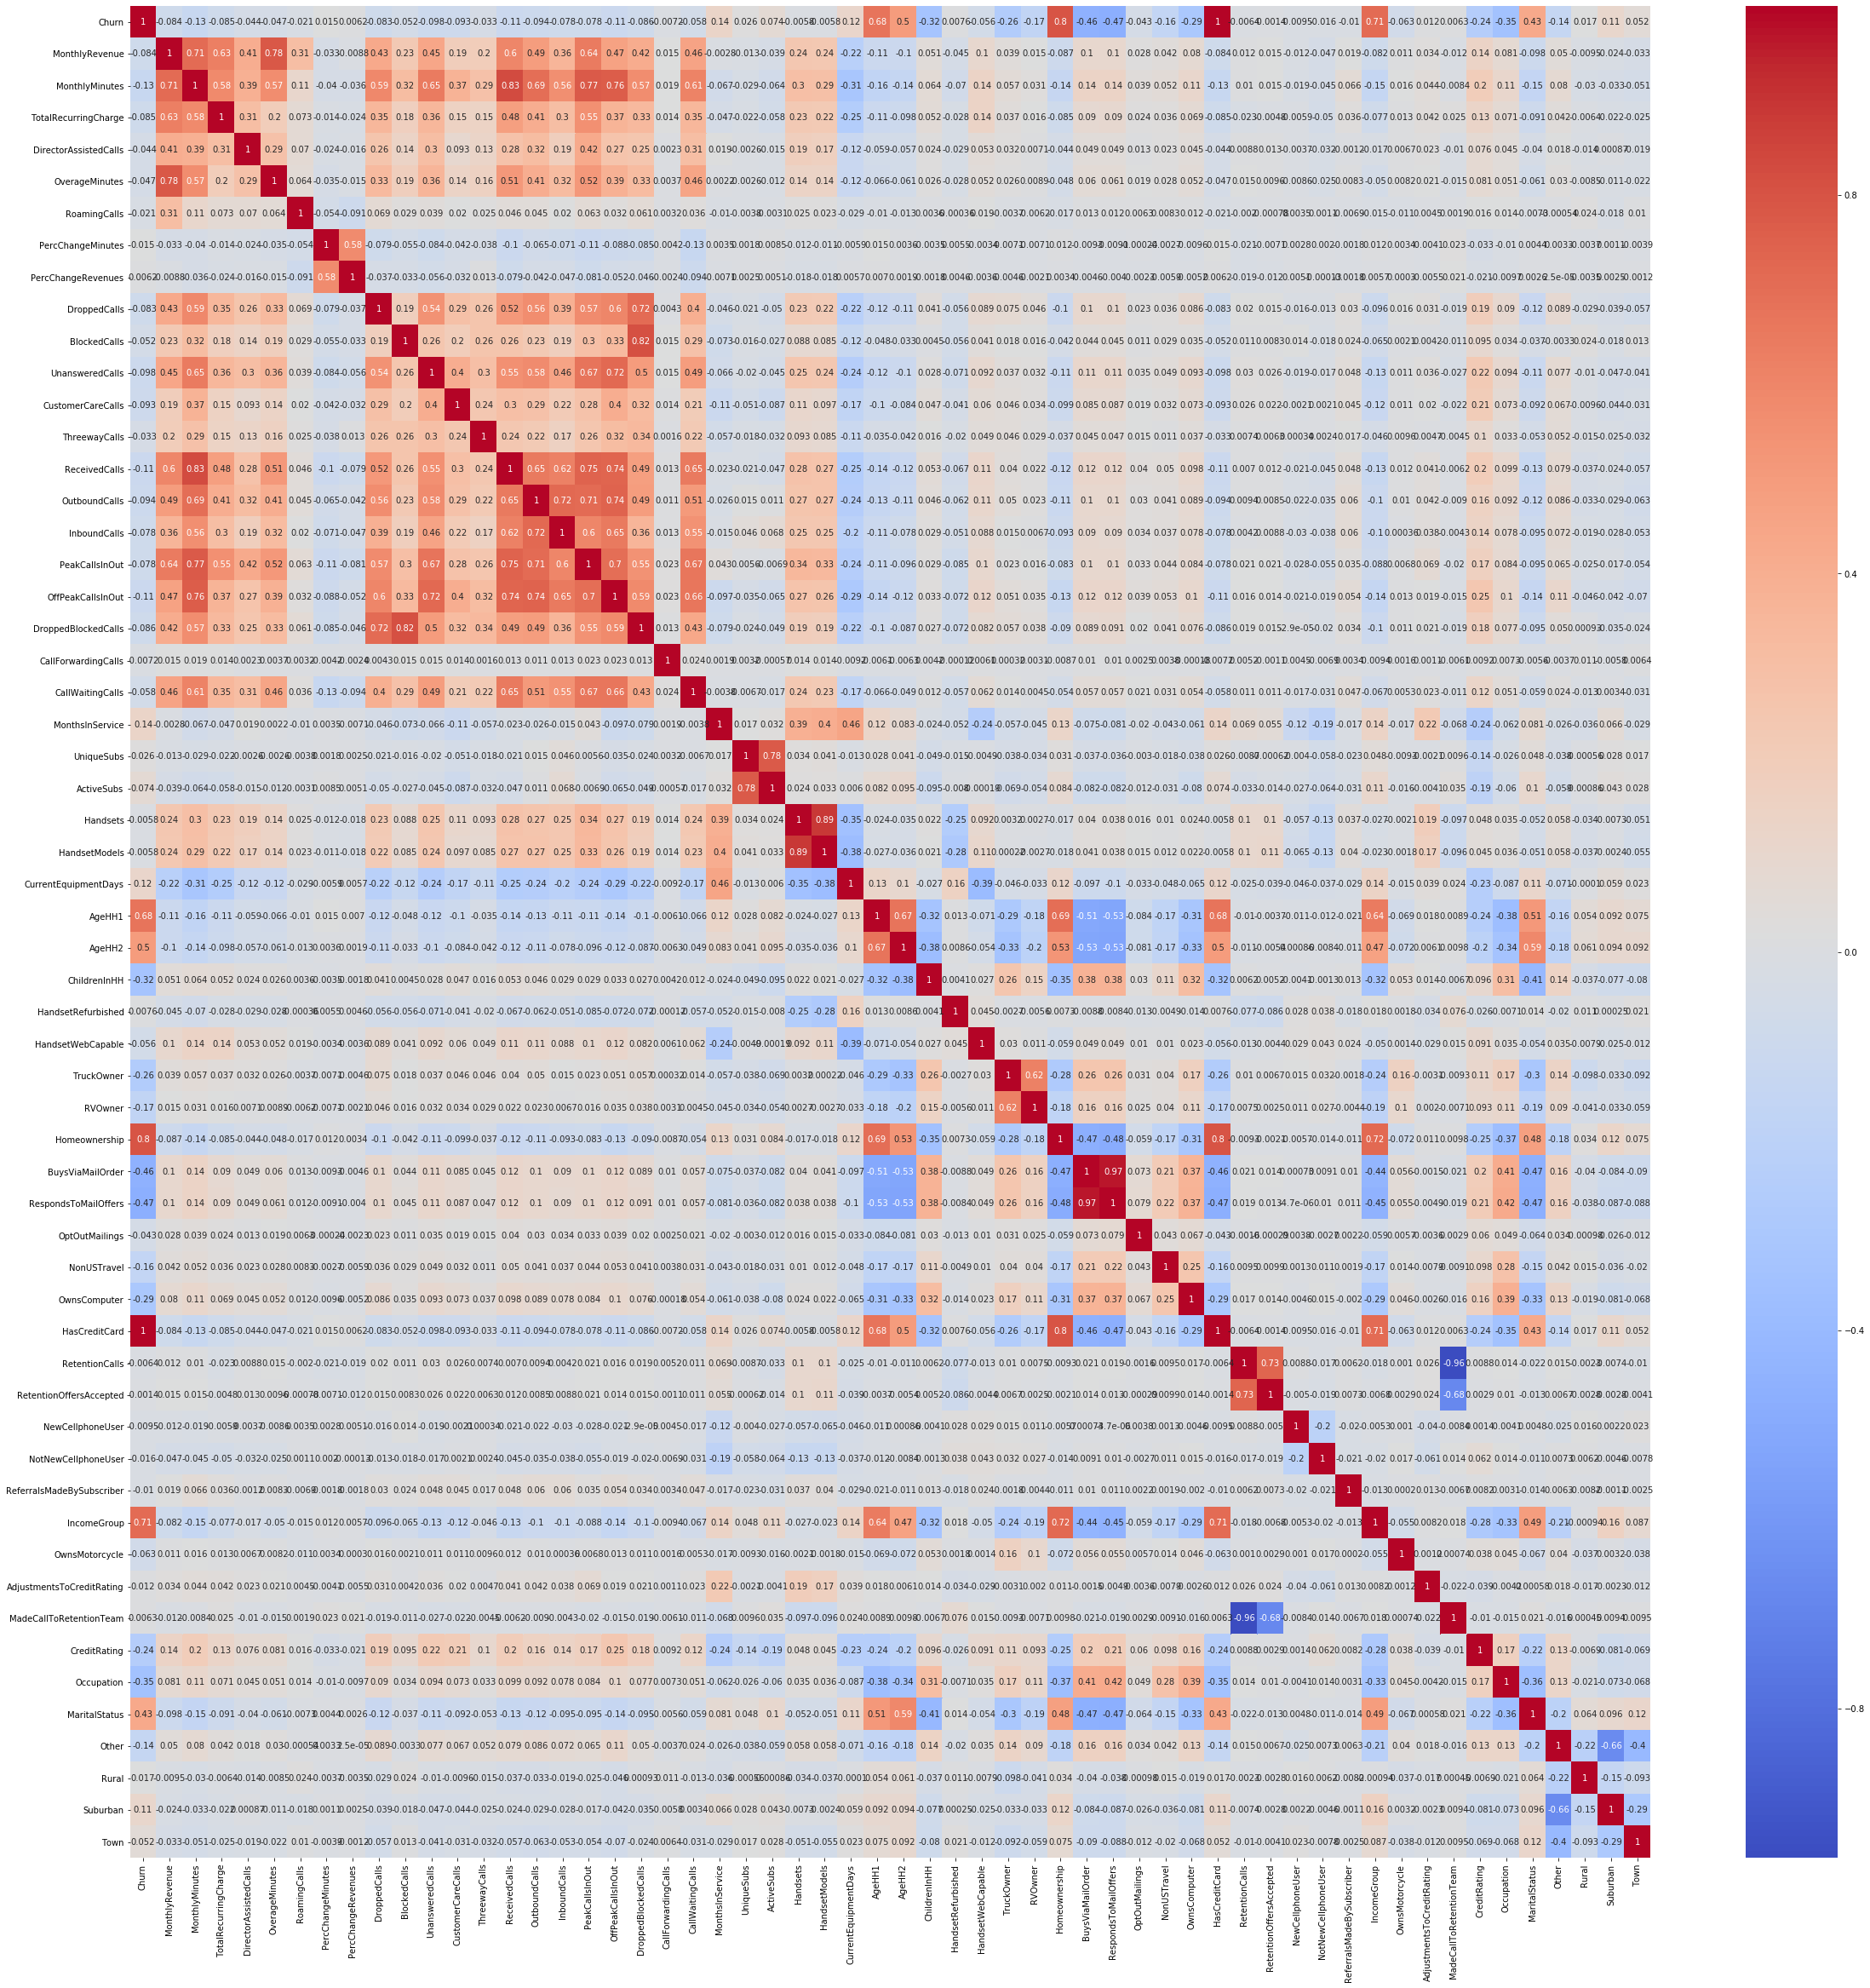

In [51]:
cr = churn.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(data=cr, xticklabels=cr.columns, yticklabels=cr.columns, annot = True, cmap = 'coolwarm', ax=ax)
plt.show()

In [52]:
churn.drop(['ReceivedCalls','OutboundCalls','PercChangeMinutes', 'PercChangeRevenues','MonthsInService','HasCreditCard','MaritalStatus','InboundCalls','PeakCallsInOut','OffPeakCallsInOut', 'Handsets', 'HandsetModels', 'DroppedBlockedCalls','CallWaitingCalls','CurrentEquipmentDays'], axis = 1, inplace = True)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn.drop(['Churn'], axis=1),
                                                    churn['Churn'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((40837, 42), (10210, 42))

In [54]:
X_train.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,Occupation,Other,Rural,Suburban,Town
10995,49.01,220.0,24.0,0.00,0.0,0.0,3.7,0.0,0.0,3.7,...,0,1,0,1,5,8,1,0,0,0
14784,166.82,706.0,60.0,2.97,153.0,0.0,21.3,1.7,43.0,3.3,...,0,1,0,1,3,8,1,0,0,0
10258,35.45,215.0,45.0,0.00,0.0,0.0,3.3,0.0,20.3,0.0,...,0,1,0,1,4,8,1,0,0,0
44546,10.20,39.0,10.0,0.00,0.0,0.1,0.0,3.0,8.7,0.0,...,1,1,0,1,1,8,1,0,0,0
48450,NaN,708.0,70.0,0.00,0.0,0.8,7.7,1.7,34.3,2.3,...,0,1,0,1,5,8,1,0,0,0


In [55]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 43 columns):
Churn                        51047 non-null int64
MonthlyRevenue               48407 non-null float64
MonthlyMinutes               48390 non-null float64
TotalRecurringCharge         48402 non-null float64
DirectorAssistedCalls        50891 non-null float64
OverageMinutes               48406 non-null float64
RoamingCalls                 50891 non-null float64
DroppedCalls                 51047 non-null float64
BlockedCalls                 51047 non-null float64
UnansweredCalls              51047 non-null float64
CustomerCareCalls            51047 non-null float64
ThreewayCalls                51047 non-null float64
CallForwardingCalls          51047 non-null float64
UniqueSubs                   51047 non-null int64
ActiveSubs                   51047 non-null int64
AgeHH1                       50138 non-null float64
AgeHH2                       50138 non-null float64
ChildrenInHH 

In [57]:
churn.isna().sum()

Churn                           0
MonthlyRevenue               2640
MonthlyMinutes               2657
TotalRecurringCharge         2645
DirectorAssistedCalls         156
OverageMinutes               2641
RoamingCalls                  156
DroppedCalls                    0
BlockedCalls                    0
UnansweredCalls                 0
CustomerCareCalls               0
ThreewayCalls                   0
CallForwardingCalls             0
UniqueSubs                      0
ActiveSubs                      0
AgeHH1                        909
AgeHH2                        909
ChildrenInHH                    0
HandsetRefurbished              0
HandsetWebCapable               0
TruckOwner                      0
RVOwner                         0
Homeownership                   0
BuysViaMailOrder                0
RespondsToMailOffers            0
OptOutMailings                  0
NonUSTravel                     0
OwnsComputer                    0
RetentionCalls                  0
RetentionOffer

In [58]:
ch = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
      'RoamingCalls', 'MonthlyRevenue', 'AgeHH1', 'AgeHH2']


In [59]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [60]:
churn_pipe = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=ch)),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    
])

In [61]:
churn_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['MonthlyRevenue',
                                              'MonthlyMinutes',
                                              'TotalRecurringCharge',
                                              'DirectorAssistedCalls',
                                              'OverageMinutes', 'RoamingCalls',
                                              'MonthlyRevenue', 'AgeHH1',
                                              'AgeHH2'])),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [62]:
# Apply Transformations
X_train=churn_pipe.transform(X_train)
X_test=churn_pipe.transform(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score , precision_score, f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [64]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

model_dummy = DummyClassifier(strategy='stratified',random_state=42)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='accuracy')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.5644884270049781

Naive Algorithm Test Performance:  0.5719882468168462


In [65]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


logit = LogisticRegression(max_iter=5000,solver='saga') 


param_grid_logit = { 'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


CV_logit_class = GridSearchCV(estimator = logit, param_grid = param_grid_logit, cv = 5, n_jobs = -1, return_train_score = True, scoring = 'accuracy')
CV_logit_class.fit(X_train, y_train)

y_pred = CV_logit_class.predict(X_test)

best_parameters_logit_class = CV_logit_class.best_params_

print('Logit parameters: ', best_parameters_logit_class)
print("Logistic Train Performance: ", CV_logit_class.score(X_train, y_train))
print("Logistic Test Performance: ", CV_logit_class.score(X_test, y_test))


# Mean Cross validation Score for best model
print("Mean Cross-validation scores for best model: {}". format(CV_logit_class.best_score_))

# Print Co-efficients
print("Logistic.coef_:", CV_logit_class.best_estimator_.coef_)
print("Logistic.intercept_:", CV_logit_class.best_estimator_.intercept_)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Logit parameters:  {'C': 10, 'penalty': 'l2'}
Logistic Train Performance:  0.9206846732130176
Logistic Test Performance:  0.9208619000979432
Mean Cross-validation scores for best model: 0.9205131566118491
Logistic.coef_: [[ 0.0146681   0.07993461 -0.10305651 -0.05604948 -0.03831198 -0.04848844
   0.07753453 -0.05326179  0.02986937 -0.00450821  0.01756177  0.00789144
  -0.07751787  0.0185881   0.54487127  0.11809888 -0.0366225   0.00608019
  -0.02044372 -0.07424648  0.01760875  1.17885883  0.09494017 -0.45503159
   0.12727427 -0.16140429 -0.15528452  0.0057182  -0.01378482 -0.0148057
  -0.01519812  0.00834159  1.07043974  0.01973826 -0.0155331  -0.04482063
  -0.12228689 -0.08242919  0.12144065 -0.09666149  0.00151058 -0.11492988]]
Logistic.intercept_: [1.52051846]
Accuracy:  0.9208619000979432


In [70]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,6)} 


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring = 'accuracy')
grid_knn.fit(X_train, y_train)

y_pred = grid_knn.predict(X_test)

print('train score: ', grid_knn.score(X_train, y_train))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.9304062492347626
Best Mean Cross-validation score: 0.9127

KNN parameters:  {'n_neighbors': 5}
KNN Test Performance:  0.9162585700293829
Accuracy:  0.9162585700293829


In [70]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20), 'min_samples_leaf' : range(1,10)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = 'accuracy')
grid_dtree.fit(X_train, y_train)

y_pred = grid_dtree.predict(X_test)

print('train score: ', grid_dtree.score(X_train, y_train))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.9287166050395474
Best Mean Cross-validation score: 0.9257

Decision Tree parameters:  {'max_depth': 6, 'min_samples_leaf': 1}
Decision Tree Test Performance:  0.9308521057786484
Accuracy:  0.9308521057786484


In [72]:
# Train a Linear SVC model

from sklearn.svm import LinearSVC,SVC
import warnings

lin_svm = LinearSVC()

param_grid_linearSVM = {'C' : [ 0.01, 0.1, 1, 10, 100, 1000], 'dual' : [False]}

CV_linearSVM_class = GridSearchCV(estimator = lin_svm, param_grid = param_grid_linearSVM ,cv = 5, n_jobs = -1, return_train_score = True, scoring = 'accuracy')
GS_results_linearSVM = CV_linearSVM_class.fit(X_train, y_train)

y_pred = GS_results_linearSVM.predict(X_test)

best_parameters_linearSVM_class = CV_linearSVM_class.best_params_

#find best parameters
print('SVM parameters: ', best_parameters_linearSVM_class)

print('train score: ', GS_results_linearSVM.score(X_train, y_train))

print("Best Mean Cross-validation score: {:.4f}".format(GS_results_linearSVM.best_score_))

# Check test data set performance
print("SVM Tree Performance: ", GS_results_linearSVM.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

SVM parameters:  {'C': 0.1, 'dual': False}
train score:  0.9169380708671058
Best Mean Cross-validation score: 0.9168
SVM Tree Performance:  0.9179236043095005
Accuracy:  0.9179236043095005


In [73]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'accuracy')
rfc_grid.fit(X_train,y_train)

y_pred = rfc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best parameters {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.9250924086290266
Best parameters {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.9279330019345202
Test score is 0.9287952987267385
Accuracy:  0.9287952987267385


In [74]:
# Train an Extra Tree Model
from  sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, scoring = 'accuracy')
etc_grid.fit(X_train,y_train)

y_pred = etc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best parameters {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.9218354616719756
Best parameters {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.9243823003648652
Test score is 0.9212536728697356
Accuracy:  0.9212536728697356


In [75]:
# Train a Gradient Boosting Model
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring = 'accuracy')
gbc_grid.fit(X_train,y_train)

y_pred = gbc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best parameters {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.9256800018276653
Best parameters {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 150}
Train score is 0.9325121825795235
Test score is 0.9291870714985309
Accuracy:  0.9291870714985309


In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
# Train a XGBoost Model
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, scoring = 'accuracy')
xgbc_grid.fit(X_train,y_train)

y_pred = xgbc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best parameters {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.9281778380710121
Best parameters {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}
Train score is 0.9323162818032666
Test score is 0.9317335945151812
Accuracy:  0.9317335945151812


In [ ]:
#Stacking Classifier

In [79]:
# Stacking top 5
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_)
                              ], final_estimator=XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, scoring = 'accuracy')
sclf1_grid.fit(X_train,y_train)

y_pred = sclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Parameters {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Mean Cross Validation Score is 0.9250189272492065
Best Parameters {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9304797120258589
Test score is 0.9297747306562194
Accuracy:  0.9297747306562194


# Cost Sensitive Algorithms

In [78]:
#cost sensitive logistic regession

logreg = LogisticRegression(solver='lbfgs')
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring='accuracy')
grid_logreg.fit(X_train,y_train)

y_pred = grid_logreg.predict(X_test)

print("Best parameters: {}".format(grid_logreg.best_params_))
print(f'Train score is {grid_logreg.score(X_train,y_train)}')
print(f'Test score is {grid_logreg.score(X_test,y_test)}')
print("Best Mean cross-validation score: {:.4f}".format(grid_logreg.best_score_))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Train score is 0.9206846732130176
Test score is 0.9204701273261509
Best Mean cross-validation score: 0.9203
Accuracy:  0.9204701273261509


In [80]:
# Decision Tree

dtree = DecisionTreeClassifier()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring='accuracy')
grid_dtree.fit(X_train,y_train)

y_pred = grid_dtree.predict(X_test)

print("Best parameters: {}".format(grid_dtree.best_params_))
print(f'Train score is {grid_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_dtree.score(X_test,y_test)}')
print("Best Mean cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters: {'class_weight': {0: 100, 1: 1}}
Train score is 1.0
Test score is 0.8897159647404506
Best Mean cross-validation score: 0.8859
Accuracy:  0.8897159647404506


In [60]:
# SVC

from sklearn.svm import LinearSVC,SVC
svc = SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring='accuracy')
grid_svc.fit(X_train,y_train)

y_pred = grid_svc.predict(X_test)

print("Best parameters: {}".format(grid_svc.best_params_))
print(f'Train score is {grid_svc.score(X_train,y_train)}')
print(f'Test score is {grid_svc.score(X_test,y_test)}')
print("Best Mean cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Train score is 0.9307980507872763
Test score is 0.9240940254652301
Best Mean cross-validation score: 0.92
Accuracy:  0.9240940254652301


In [63]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=10, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance

print('Mean CV: %.3f' % scores.mean())

Mean CV: 0.922


In [64]:
#extratrees
from  sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(et, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean CV: %.3f' % scores.mean())

Mean CV: 0.926


In [65]:
from  xgboost import XGBClassifier
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='accuracy')
grid_xgboost.fit(X_train,y_train)

y_pred = grid_xgboost.predict(X_test)

print(f'Train score is {grid_xgboost.score(X_train,y_train)}')
print(f'Test score is {grid_xgboost.score(X_test,y_test)}')

print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(grid_xgboost.best_score_))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Train score is 0.9600607292406396
Test score is 0.9276199804113614
Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.9248
Accuracy:  0.9276199804113614


In [67]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [68]:
#Bagging decision tree with under sampling

from imblearn.ensemble import BalancedBaggingClassifier

dtree = BalancedBaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(dtree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance

print('Mean CV: %.3f' % scores.mean())

Mean CV: 0.910


In [73]:
# Dtree with oversampling

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

pipe_dtree_smote = Pipeline([('smote', SMOTE()), ('dtree', DecisionTreeClassifier())])
param_grid = {
    
    'smote__k_neighbors': [1,2,3,4,5],
}

#apply grid search
grid_smote= GridSearchCV(pipe_dtree_smote, param_grid, cv=5, n_jobs=2, scoring='accuracy')
grid_smote.fit(X_train,y_train)

y_pred = grid_smote.predict(X_test)

print(f'Train score is {grid_smote.score(X_train,y_train)}')
print(f'Test score is {grid_smote.score(X_test,y_test)}')

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(grid_smote.best_score_))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Train score is 1.0
Test score is 0.8765915768854065
Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.8774
Accuracy:  0.8765915768854065


**Trying to access following models on sample to test accuracy, on sample all these models are giving accuracy and cv scores less than other models ran before. So, assuming on full dataset, these models won't give better result than others. Also, I tried to run on full data, but didn't get any output even after 5 hours of running.**

In [72]:
churn_1 = churn.sample(n=5000, random_state = 42)

In [62]:
from sklearn.svm import LinearSVC,SVC
svc_kernel = SVC(kernel = 'rbf')
#define a list of parameters
param_grid_svc = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc, cv=5, n_jobs = -1, return_train_score = True, scoring = 'accuracy')
grid_svc_kernel.fit(X_train, y_train)

y_pred = grid_svc_kernel.predict(X_test)

print('train score: ', grid_svc_kernel.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel.best_params_))

print("Best Mean cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))
print("Performance: ", grid_svc_kernel.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.96425
Best parameters: {'C': 1, 'gamma': 0.1}
Best Mean cross-validation score: 0.89
Performance:  0.894
Accuracy:  0.894


In [63]:
svc_kernel = SVC(kernel = 'poly')
#define a list of parameters
param_grid_svc_P = {'C': [1, 10, 100,1000,10000],'degree':[1,3]}

#apply grid search
grid_svc_kernel_P = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc_P, cv=5, n_jobs = -1, return_train_score = True, scoring = 'accuracy')
grid_svc_kernel_P.fit(X_train, y_train)

y_pred = grid_svc_kernel_P.predict(X_test)

print('train score: ', grid_svc_kernel_P.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel_P.best_params_))

print("Best Mean cross-validation score: {:.2f}".format(grid_svc_kernel_P.best_score_))
print("Performance: ", grid_svc_kernel_P.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.94425
Best parameters: {'C': 1, 'degree': 3}
Best Mean cross-validation score: 0.92
Performance:  0.918
Accuracy:  0.918


In [64]:
svc_kernel = SVC(kernel = 'sigmoid', probability=True)
#define a list of parameters
param_grid_svc_S = {'C': [1, 10, 100,1000,10000], 'gamma':[0.1, 1, 10, 100]}

#apply grid search
grid_svc_kernel_S = GridSearchCV(estimator = svc_kernel, param_grid = param_grid_svc_S, cv=5, n_jobs = -1, return_train_score = True, scoring = 'accuracy')
grid_svc_kernel_S.fit(X_train, y_train)

y_pred = grid_svc_kernel_S.predict(X_test)

print('train score: ', grid_svc_kernel_S.score(X_train, y_train))

print("Best parameters: {}".format(grid_svc_kernel_S.best_params_))

print("Best Mean cross-validation score: {:.4f}".format(grid_svc_kernel_S.best_score_))
print("Performance: ", grid_svc_kernel_S.score(X_test,y_test))
print("Accuracy: ", accuracy_score(y_test, y_pred))

train score:  0.8305
Best parameters: {'C': 1, 'gamma': 0.1}
Best Mean cross-validation score: 0.8417
Performance:  0.84
Accuracy:  0.84
